<a href="https://colab.research.google.com/github/alexc6h6/Sequences-Model-RNN/blob/master/Sunspots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM

print(tf.__version__)


2.2.0


In [0]:
#!pip install tf-nightly-2.0-preview


In [3]:
drive.mount('/content/drive')

!ls '/content/drive/My Drive/Sunspots.csv'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
'/content/drive/My Drive/Sunspots.csv'


In [10]:
data = pd.read_csv('/content/drive/My Drive/Sunspots.csv', index_col = 'Date')

data.rename(columns = {'Unnamed: 0': 'Number'}, inplace = True)

data.head()

,Number,Monthly Mean Total Sunspot Number
Date,,
1749-01-31,0,96.7
1749-02-28,1,104.3
1749-03-31,2,116.7
1749-04-30,3,92.8
1749-05-31,4,141.7


In [12]:
print(data.shape)
data.info()

(3252, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 3252 entries, 1749-01-31 to 2019-12-31
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number                             3252 non-null   int64  
 1   Monthly Mean Total Sunspot Number  3252 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 76.2+ KB


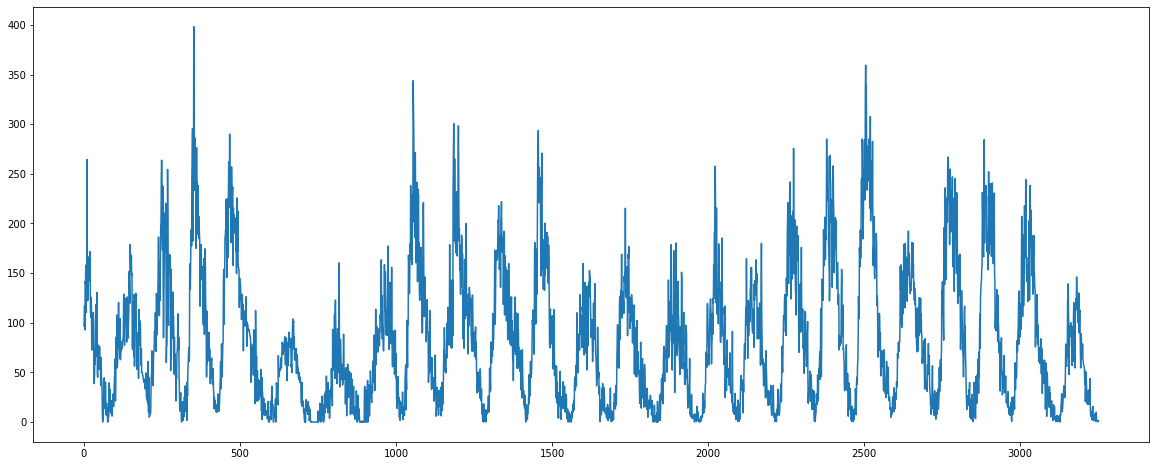

In [14]:
time = data['Number']
series = data['Monthly Mean Total Sunspot Number']

fig = plt.figure(figsize = (20, 8))
plt.plot(time, series)
plt.show()

In [27]:
time_split = 2887   #3252-365

train_time = time[:time_split]
train_series = series[:time_split]

val_time = time[time_split:]
val_series = series[time_split:]

print(train_time.shape, train_series.shape)


(2887,) (2887,)


In [0]:
window_size = 12*11
shuffle_buffer = 100
batch_size = 64

In [0]:
def windowed_dataset(series, window_size, shuffle_buffer, batch_size):
  series = tf.expand_dims(series, axis = -1)
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size +1, shift = 1, drop_remainder = True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size +1))
  dataset = dataset.shuffle(shuffle_buffer)
  dataset = dataset.map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset
  

In [36]:
dataset = windowed_dataset(train_series, window_size, shuffle_buffer, batch_size)

for x, y in dataset:
  print(x.shape, y.shape)

(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(64, 132, 1) (64, 1)
(3, 132, 1) (3, 1)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, None, 128)         1536      
_________________________________________________________________
bidirectional_8 (Bidirection (None, None, 256)         263168    
_________________________________________________________________
bidirectional_9 (Bidirection (None, 256)               394240    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               131584    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
activation_5 (Activation)    (None, 512)              

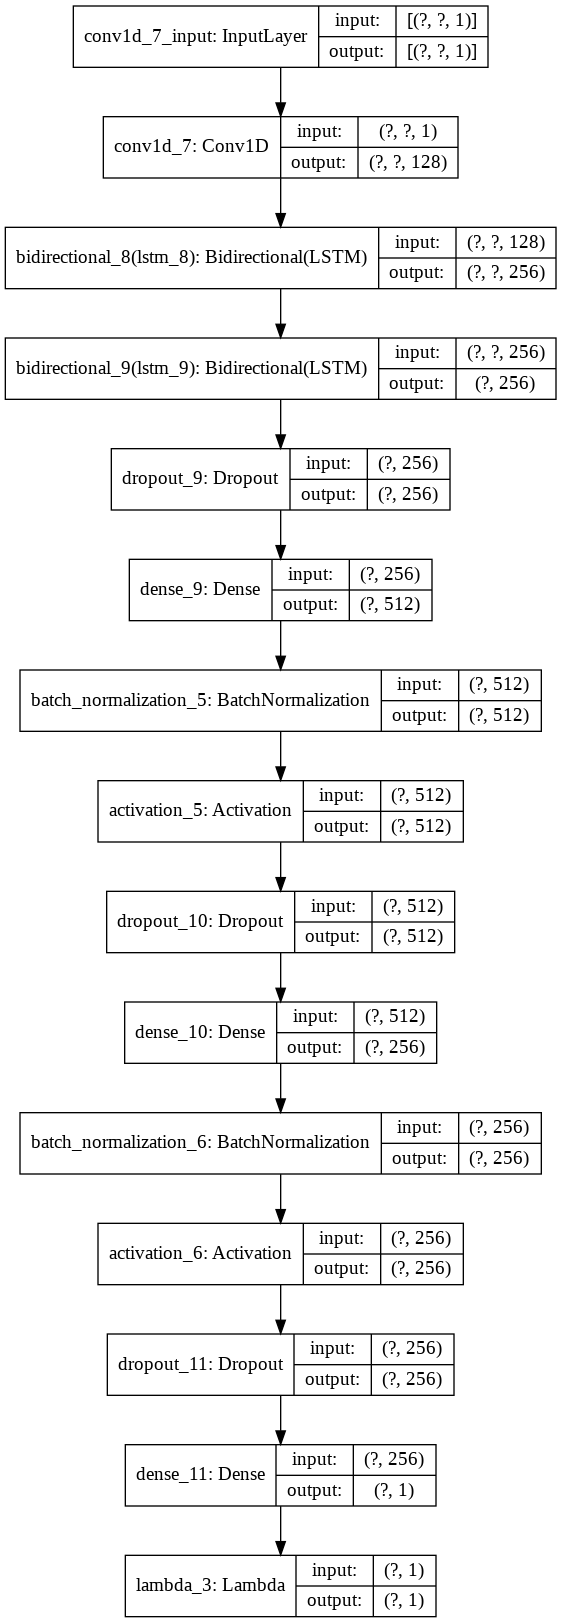

In [59]:
units = 128

model = tf.keras.models.Sequential([tf.keras.layers.Conv1D(units, kernel_size = 11, strides = 1, padding = 'causal',
                                                           activation = 'relu', input_shape = [None, 1]),
                                    tf.keras.layers.Bidirectional(LSTM(units, return_sequences = True)),
                                    tf.keras.layers.Bidirectional(LSTM(units)),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Dense(512),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Activation('relu'),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Dense(256),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Activation('relu'),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Dense(units = 1),
                                    tf.keras.layers.Lambda(lambda x : x * 400.0)])

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse', 'mae'])

model.summary()
tf.keras.utils.plot_model(model, show_shapes = True)

In [0]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_reducer = ReduceLROnPlateau(monitor = 'mae', 
                               min_lr = 0.00000001, 
                               verbose = 1, 
                               patience = 5, 
                               factor = 0.033)

In [61]:
history = model.fit(dataset, 
                    epochs = 100, 
                    verbose =1, 
                    callbacks = [lr_reducer])

Epoch 1/100
44/44 [==============================] - 5s 110ms/step - loss: 118487.9297 - mse: 118487.9297 - mae: 272.3115 - lr: 0.0010
Epoch 2/100
44/44 [==============================] - 5s 105ms/step - loss: 71300.0391 - mse: 71300.0391 - mae: 213.6723 - lr: 0.0010
Epoch 3/100
44/44 [==============================] - 5s 105ms/step - loss: 52100.2578 - mse: 52100.2578 - mae: 180.3844 - lr: 0.0010
Epoch 4/100
44/44 [==============================] - 5s 105ms/step - loss: 40022.2812 - mse: 40022.2812 - mae: 159.1725 - lr: 0.0010
Epoch 5/100
44/44 [==============================] - 5s 104ms/step - loss: 30303.9160 - mse: 30303.9160 - mae: 137.6208 - lr: 0.0010
Epoch 6/100
44/44 [==============================] - 5s 105ms/step - loss: 21690.4902 - mse: 21690.4902 - mae: 116.0053 - lr: 0.0010
Epoch 7/100
44/44 [==============================] - 5s 105ms/step - loss: 18130.1211 - mse: 18130.1211 - mae: 105.9502 - lr: 0.0010
Epoch 8/100
44/44 [==============================] - 5s 105ms/step 

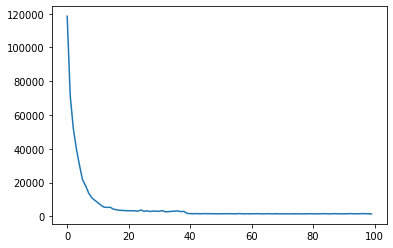

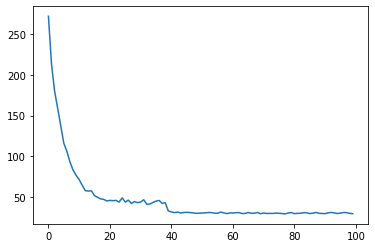

In [62]:
plt.plot(history.history['loss'])
plt.show()

plt.plot(history.history['mae'])
plt.show()

In [0]:
def forecast(model, series, window_size, batch_size):
  forecast = tf.data.Dataset.from_tensor_slices(series)
  forecast = forecast.window(window_size, shift = 1, drop_remainder = True)
  forecast = forecast.flat_map(lambda window: window.batch(window_size))
  forecast = forecast.batch(batch_size).prefetch(1)
  forecast = model.predict(forecast)
  return forecast



In [64]:
forecast = forecast(model, series[:, np.newaxis], window_size, batch_size)
forecast = forecast[time_split-window_size:-1]

print(forecast.shape)

(365, 1)


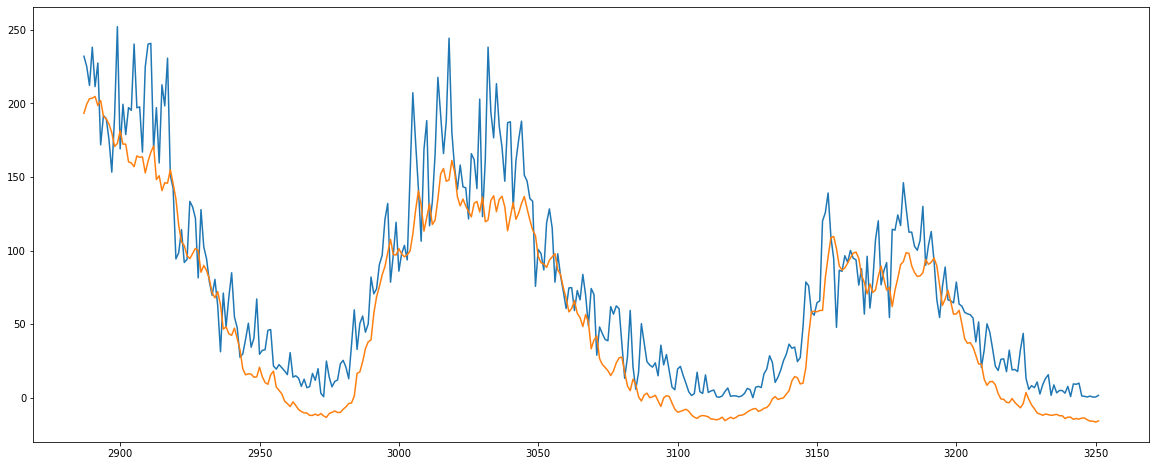

In [65]:
fig = plt.figure(figsize = (20, 8))
plt.plot(val_time, val_series)
plt.plot(val_time, forecast)
plt.show()

In [0]:
tf.keras.metrics.mean_absolute_error(validation_series, forecast).numpy()


[137.51743  142.01674  155.21098  135.01447  145.4183   140.02539
 142.89032  134.93317  133.83446  138.93172  121.02835  121.71069
 132.12253  143.53506  116.638954 119.67677  115.127785 110.971405
 112.32223  126.05302  107.828636 112.07597  105.19071  114.917496
 122.27116  117.56774   96.08202  102.688034  89.42508   98.547775
 101.59755  106.85754   83.31944   82.90834   66.52592   71.07921
  71.624115  61.35818   61.27536   74.30573   68.178696  68.79122
  60.333263  64.728264  64.69949   58.609093  58.441963  54.974945
  55.876877  54.35859   53.74518   53.556282  55.853386  53.924465
  54.07636   53.75853   54.033653  56.248486  57.32237   56.601074
  55.65614   57.91952   57.1296    55.373154  60.373436  57.805077
  58.374146  56.434402  56.356464  58.184414  59.282005  61.41974
  64.51465   65.00861   64.07558   62.80877   66.0366    65.10923
  66.02537   67.15443   67.31191   68.83615   69.61831   70.60503
  68.464485  65.64163   69.50314   69.52225   67.24901   71.146385
  